In [20]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set('poster')
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

In [94]:
models = ['resnet', 'densenet', 'b-resnet', 'b-densenet', 'msdnet']

pc_runs = {
    'resnet': pd.read_csv('resnet_conv_inference_test.csv', index_col=0),
    'densenet': pd.read_csv('dense_conv_inference_test.csv', index_col=0),
    'b-resnet': pd.read_csv('resnet101_all_inference_test.csv', index_col=0),
    'b-densenet': pd.read_csv('densenet-after-del_inference_test.csv', index_col=0),
    'msdnet' : pd.read_csv('msdnet_inference_test.csv', index_col=0)
}

pc_runs

{'resnet':       threshold                    exit  prediction  target  correct  \
 0           0.5  conventional inference           0       0     True   
 1           0.5  conventional inference           0       0     True   
 2           0.5  conventional inference           0       0     True   
 3           0.5  conventional inference           0       0     True   
 4           0.5  conventional inference           0       0     True   
 ...         ...                     ...         ...     ...      ...   
 4995        0.5  conventional inference          99      99     True   
 4996        0.5  conventional inference          99      99     True   
 4997        0.5  conventional inference          99      99     True   
 4998        0.5  conventional inference          99      99     True   
 4999        0.5  conventional inference          99      99     True   
 
       score_margin      time  
 0         0.999941  1.029331  
 1         0.999995  0.044082  
 2         0.999

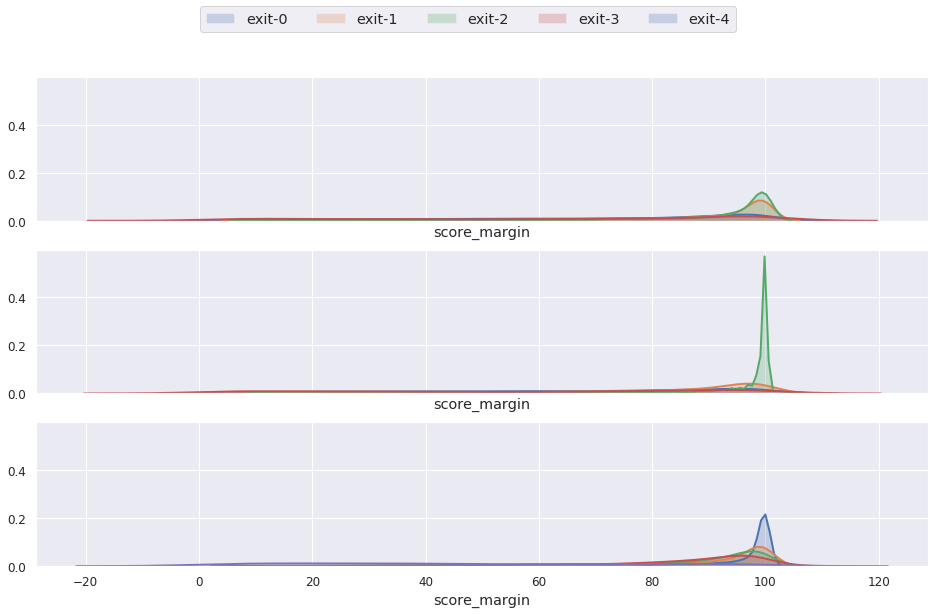

In [224]:
fig, axes = plt.subplots(3,1, figsize=(16,9), sharex=True, sharey=True)
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=False, kde=True, bins=100)

for score in pc_runs['b-resnet'].groupby('exit').score_margin:
    sns.distplot(score[1]*100, ax=axes[1], **kwargs)

for score in pc_runs['b-densenet'].groupby('exit').score_margin:
    sns.distplot(score[1]*100, ax=axes[0], **kwargs)

for score in pc_runs['msdnet'].groupby('exit').score_margin:
    sns.distplot(score[1]*100, ax=axes[2], **kwargs)
fig.legend(['exit-{}'.format(x) for x in range(5)], loc='upper center', #bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=False, ncol=5, fontsize='large')


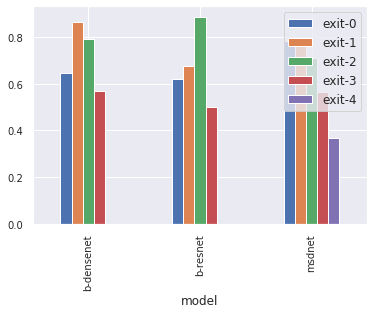

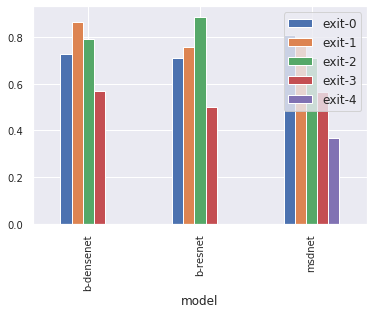

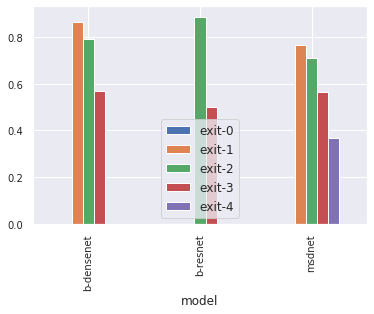

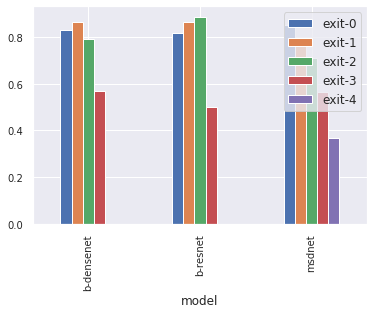

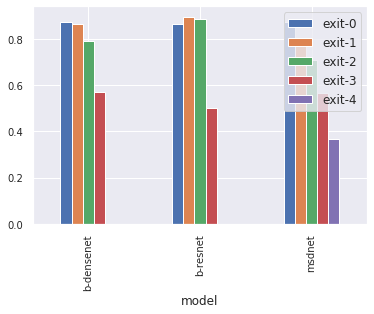

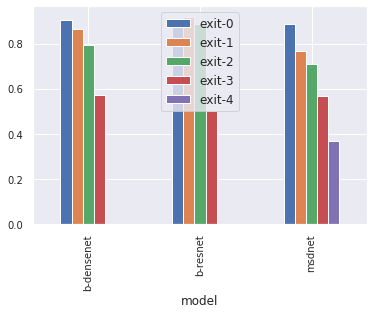

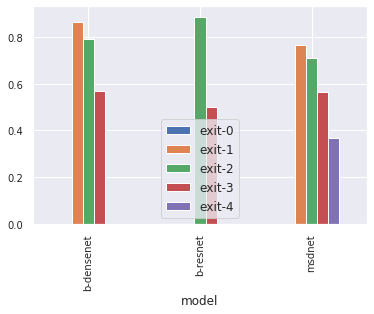

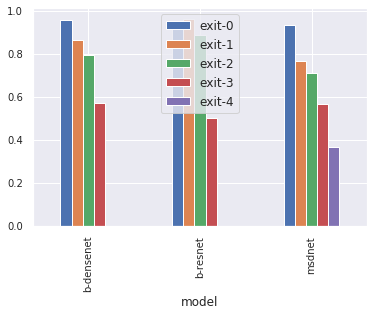

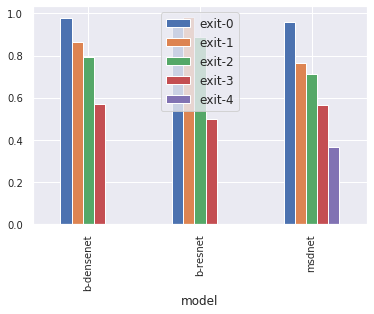

In [24]:
models = ['b-densenet', 'b-resnet', 'msdnet']

for i in x:
    df = pd.DataFrame({
            'model':models,
            'exit-0':np.array([ee_dense.loc[(ee_dense['exit']==0) & (ee_dense['threshold']==i)].mean().correct, 
             ee_res.loc[(ee_res['exit']==0) & (ee_res['threshold']==i)].mean().correct, 
             ee_msd.loc[(ee_msd['exit']==0) & (ee_msd['threshold']==i)].mean().correct]),
            'exit-1':np.array([ee_dense.loc[ee_dense['exit']==1].mean().correct, 
             ee_res.loc[(ee_res['exit']==1) & (ee_res['threshold']==i)].mean().correct, 
             ee_msd.loc[ee_msd['exit']==1].mean().correct]),
            'exit-2': np.array([ee_dense.loc[ee_dense['exit']==2].mean().correct, 
             ee_res.loc[ee_res['exit']==2].mean().correct, 
             ee_msd.loc[ee_msd['exit']==2].mean().correct]),
            'exit-3': np.array([ee_dense.loc[ee_dense['exit']==3].mean().correct, 
             ee_res.loc[ee_res['exit']==3].mean().correct, 
             ee_msd.loc[ee_msd['exit']==3].mean().correct]),
            'exit-4': np.array([ee_dense.loc[ee_dense['exit']==4].mean().correct, 
             ee_res.loc[ee_res['exit']==4].mean().correct, 
             ee_msd.loc[ee_msd['exit']==4].mean().correct])

    })

    df.set_index('model').plot(kind='bar')

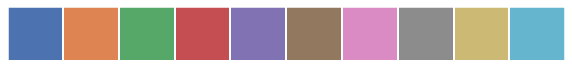

In [26]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [27]:
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cols=["Mean Accuracy", "Mean Time", "Std. Accuracy", "Std. Time"]
pc_runs_stats = {model: pd.DataFrame(
    columns=cols) for model in models[2:]}
pc_runs_stats

{'b-resnet': Empty DataFrame
 Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
 Index: [], 'b-densenet': Empty DataFrame
 Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
 Index: [], 'msdnet': Empty DataFrame
 Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
 Index: []}

In [28]:
for model in pc_runs_stats:
    for treshold in pc_runs[model].groupby(['threshold']):
        mean = treshold[1].mean()
        std = treshold[1].std()
        pc_runs_stats[model] = pc_runs_stats[model].append(dict(zip(cols, [mean.correct, mean.time, std.correct, std.time])),ignore_index=True)
    pc_runs_stats[model] = pc_runs_stats[model].set_index(pd.Index(x))

In [146]:
time_thresholds = np.arange(0.01, 0.08, 0.003)
model_time_threshold = {
    x : {t : {} for t in time_thresholds*1000} for x in models[2:]
}
for threshold in time_thresholds:
    for model in models[2:]:
        result = pc_runs_stats[model].loc[pc_runs_stats[model]['Mean Time'] < threshold].max()
        if not np.isnan(result).any():
            model_time_threshold[model][threshold*1000]['accuracy'] = result['Mean Accuracy']
            model_time_threshold[model][threshold*1000]['time'] = result['Mean Time']*1000
        else:
            model_time_threshold[model][threshold*1000] = None

In [147]:
bresnet = pd.DataFrame(model_time_threshold['b-resnet']).T
bresnet

,accuracy,time
10.0,None,None
13.0,None,None
16.0,None,None
19.0,0.6458,17.3762
22.0,0.7352,21.0335
25.0,0.7884,23.6829
28.0,0.8226,26.2216
31.0,0.8662,29.9326
34.0,0.8842,33.7423
37.0,0.8902,36.7331


In [148]:
bdensenet = pd.DataFrame(model_time_threshold['b-densenet']).T

In [149]:
msdnet = pd.DataFrame(model_time_threshold['msdnet']).T

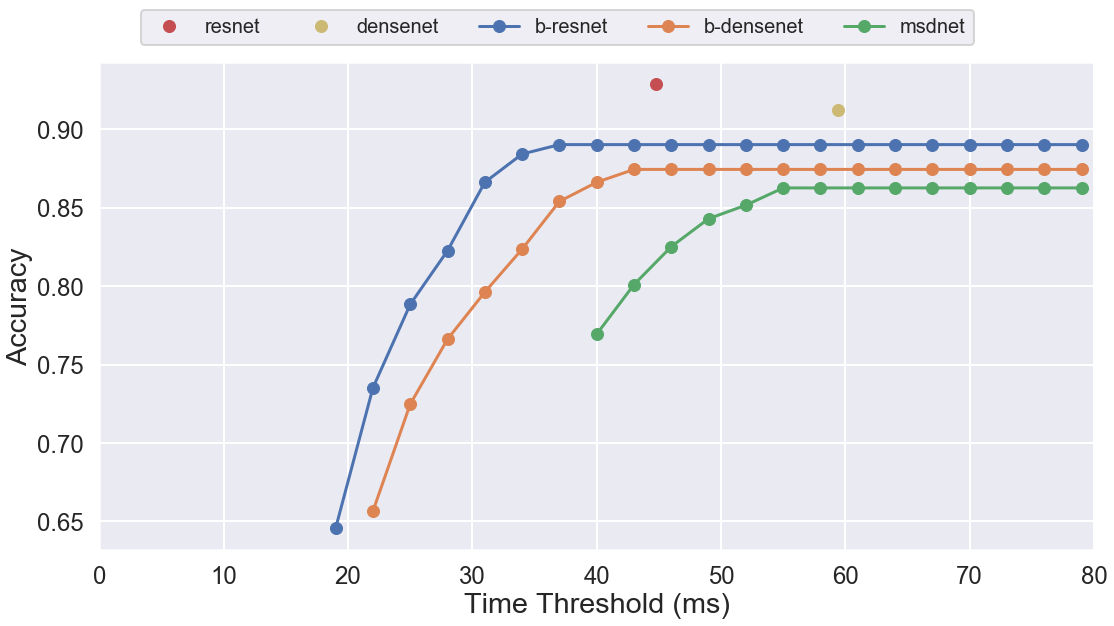

In [151]:
fig, axes = plt.subplots(1,1)
axes.plot(pc_runs['resnet'].time.mean()*1000,pc_runs['resnet'].correct.mean(),'ro') 
axes.plot(pc_runs['densenet'].time.mean()*1000,pc_runs['densenet'].correct.mean(),'yo')                  
axes.plot(bresnet['accuracy'], marker='o')
axes.plot(bdensenet['accuracy'], marker='o')
axes.plot(msdnet['accuracy'], marker='o')

fig.legend(models, ncol=5, loc="upper center", fontsize='small')
axes.set(xlabel='Time Threshold (ms)', ylabel='Accuracy')
axes.set_xlim([0,80])
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('time_threshold_pc.png')

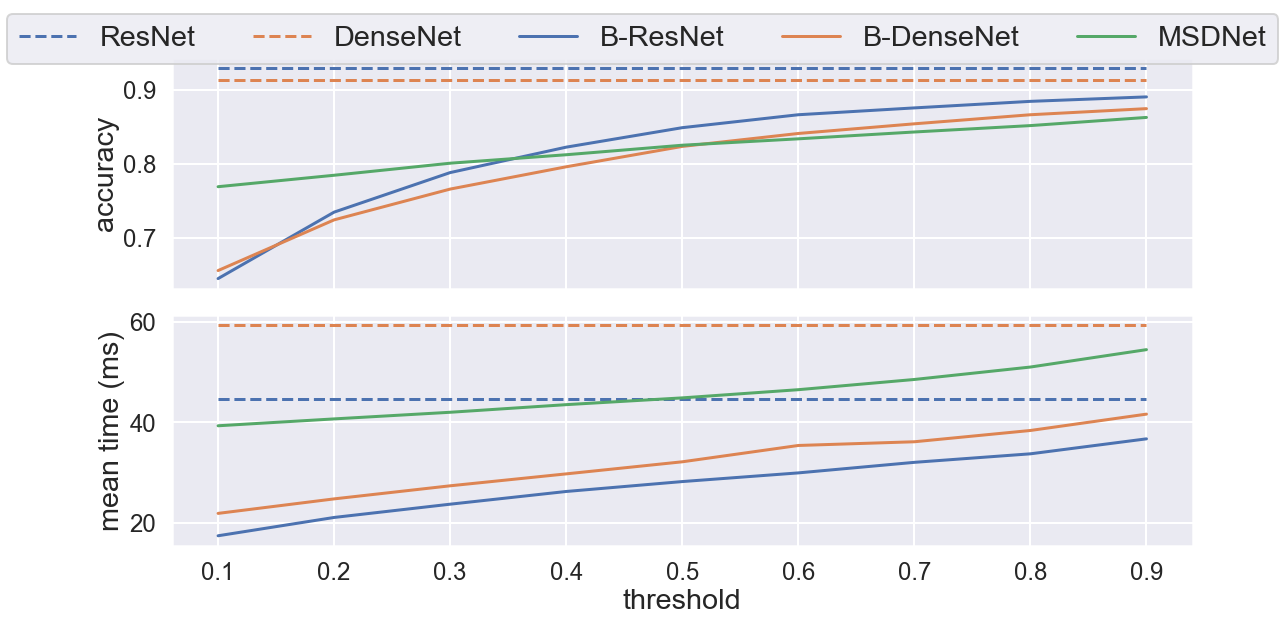

In [30]:
fig, axes = plt.subplots(2,1, sharex=True)
sns.lineplot(x=x, y=pc_runs['resnet'].correct.mean()*np.ones(9), ax=axes[0], color=current_palette[0])
sns.lineplot(x=x, y=pc_runs['resnet'].time.mean()*np.ones(9)*1000, ax=axes[1], color=current_palette[0])

sns.lineplot(x=x, y=pc_runs['densenet'].correct.mean()*np.ones(9), ax=axes[0],  color=current_palette[1])
sns.lineplot(x=x, y=pc_runs['densenet'].time.mean()*np.ones(9)*1000, ax=axes[1],  color=current_palette[1])

sns.lineplot(data=pc_runs_stats['b-resnet']['Mean Accuracy'], ax=axes[0], color=current_palette[0])
sns.lineplot(data=pc_runs_stats['b-resnet']['Mean Time']*1000, ax=axes[1], color=current_palette[0])

sns.lineplot(data=pc_runs_stats['b-densenet']['Mean Accuracy'], ax=axes[0], color=current_palette[1])
sns.lineplot(data=pc_runs_stats['b-densenet']['Mean Time']*1000, ax=axes[1], color=current_palette[1])

sns.lineplot(data=pc_runs_stats['msdnet']['Mean Accuracy'], ax=axes[0], color=current_palette[2])
sns.lineplot(data=pc_runs_stats['msdnet']['Mean Time']*1000, ax=axes[1], color=current_palette[2])

axes[0].set_ylabel('accuracy')
axes[1].set_ylabel('mean time (ms)')
plt.xlabel('threshold')



axes[0].lines[0].set_linestyle("--")

axes[1].lines[0].set_linestyle("--")

axes[0].lines[1].set_linestyle("--")

axes[1].lines[1].set_linestyle("--")


fig.legend([ 'ResNet', 'DenseNet', 'B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=5, loc="upper center")
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('compare_exiting_vs_no_exiting.png', dpi=300)

In [ ]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=True, kde=True, bins=100)
fig, axes = plt.subplots(2,1, sharex=True, sharey=True)
for exit in range(0,4):
    sns.distplot(output['ResNet'][exit][0][35:180001], ax=axes[0], **kwargs)
    
fig.legend(['exit-0', 'exit-1', 'exit-2', 'end'], loc='upper center', #bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=False, ncol=4, fontsize='large')
plt.xlabel('time (ms)')
plt.ylabel('density')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
axes[0].set_title('B-ResNet')
axes[1].set_title('B-DenseNet')
for a in axes.flat:
    a.set(xlabel='Time (ms)', ylabel='Density')
    a.label_outer()

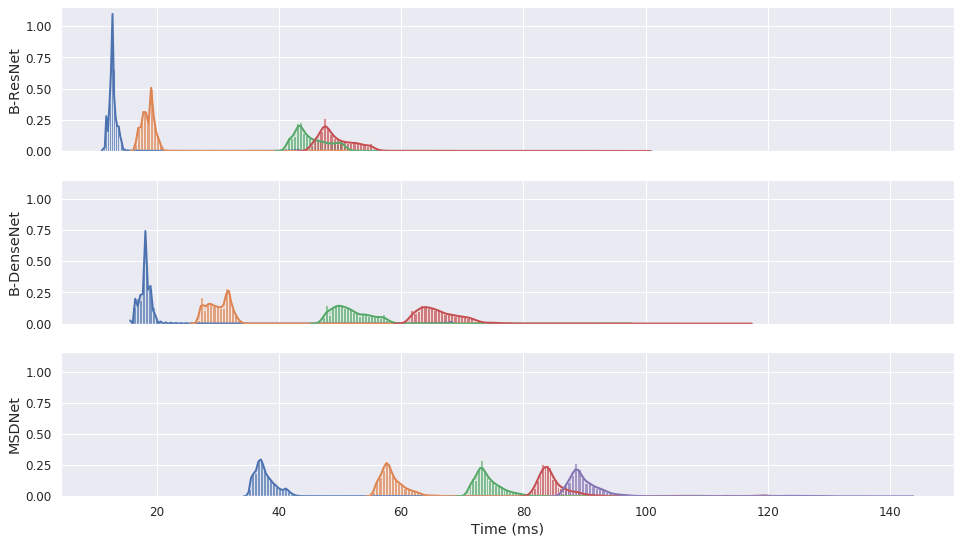

In [222]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=True, kde=True, bins=100)
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
for exit in range(4):
    sns.distplot(pc_runs['b-resnet'].loc[pc_runs['b-resnet'].exit==exit].time[1:]*1000,ax=axes[0], **kwargs)
    sns.distplot(pc_runs['b-densenet'].loc[pc_runs['b-densenet'].exit==exit].time[1:]*1000,ax=axes[1], **kwargs)
for exit in range(5):
    sns.distplot(pc_runs['msdnet'].loc[pc_runs['msdnet'].exit==exit].time[1:]*1000,ax=axes[2], **kwargs)

labels = ['B-ResNet', 'B-DenseNet', 'MSDNet']
for ax, label in zip(axes.flat, labels):
    ax.set(xlabel='Time (ms)', ylabel=label)
    ax.label_outer()
plt.savefig('inference_time_distribution.png')

exit
0    12.869136
1    18.606198
2    45.314438
3    49.448439
Name: time, dtype: float64
exit
0    17.964638
1    29.928949
2    51.557571
3    66.200899
Name: time, dtype: float64
exit
0    38.433392
1    59.598200
2    75.701231
3    86.062633
4    91.627240
Name: time, dtype: float64


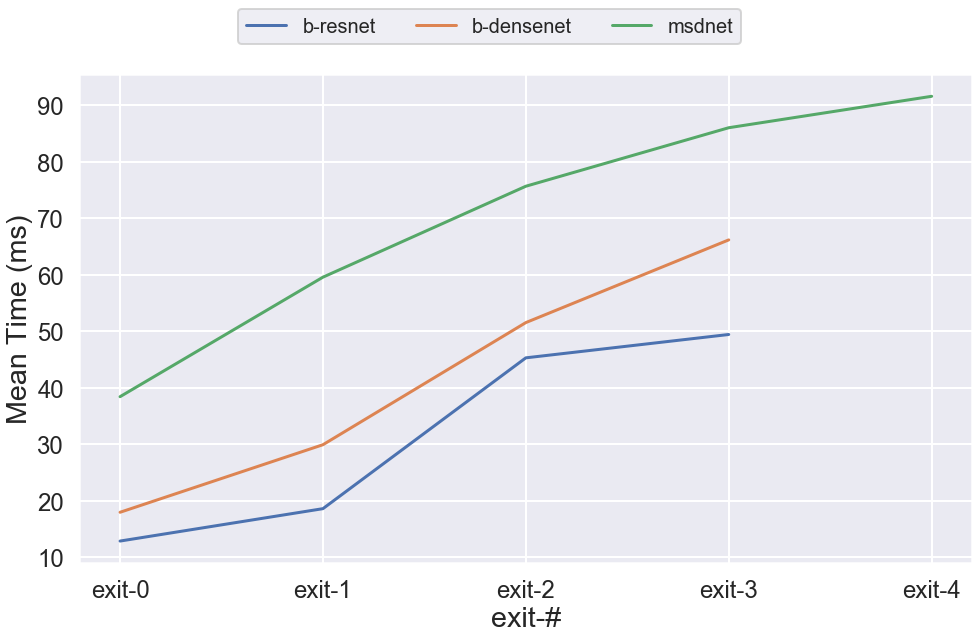

In [24]:
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
for model in models[2:]:
    time = pc_runs[model].groupby('exit').time.mean()
    print(time*1000)
    sns.lineplot(data=time*1000,ax=ax)
x = np.arange(0,5,1)
ax.set_xticks(x)
ax.set_xticklabels(['exit-{}'.format(n) for n in x])
ax.set(xlabel='exit-#', ylabel='Mean Time (ms)')
fig.legend(['{}'.format(model) for model in models[2:]], loc='upper center', #bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=False, ncol=3, fontsize='small')
plt.savefig('exit_time.png')

In [208]:
pc_runs['b-resnet'].loc[pc_runs['b-resnet'].exit==0].time[1:]

1        0.014066
2        0.014050
3        0.012749
4        0.013005
5        0.012808
           ...   
44876    0.012839
44890    0.012536
44934    0.012217
44935    0.012727
44942    0.012837
Name: time, Length: 13389, dtype: float64

In [196]:
pc_runs['densenet'].correct.mean()

0.9124

In [30]:
len(ee_res.loc[ee_res['exit']==0])

13389

In [31]:
len(ee_res.loc[(ee_res['exit']==0) & (ee_res['correct'] == False)])

3062

In [32]:
len(ee_res.loc[ee_res['exit']==1])

14011

In [33]:
len(ee_res.loc[ee_res['exit']==2])

14136

In [34]:
len(ee_res.loc[ee_res['exit']==3])

3463

In [35]:
len(ee_res.loc[(ee_res['exit']==3) & (ee_res['correct'] == False)])

1736

In [36]:
len(ee_res.loc[(ee_res['correct'] == False)])

8216

In [37]:
ee_res.groupby(['threshold', 'exit']).size()

threshold  exit
0.1        0.0     3297
           1.0     1252
           2.0      424
           3.0       26
0.2        0.0     2456
           1.0     1584
           2.0      875
           3.0       85
0.3        0.0     1940
           1.0     1704
           2.0     1184
           3.0      172
0.4        0.0     1571
           1.0     1717
           2.0     1448
           3.0      264
0.5        0.0     1285
           1.0     1708
           2.0     1653
           3.0      354
0.6        0.0     1029
           1.0     1673
           2.0     1853
           3.0      445
0.7        0.0      828
           1.0     1582
           2.0     2039
           3.0      551
0.8        0.0      615
           1.0     1489
           2.0     2220
           3.0      676
0.9        0.0      368
           1.0     1302
           2.0     2440
           3.0      890
dtype: int64

In [38]:
 ee_msd.groupby(['threshold', 'exit', 'correct']).size()

threshold  exit  correct
0.1        0.0   0.0        1020
                 1.0        3684
           1.0   0.0         114
                 1.0         141
           2.0   0.0          17
                            ... 
0.9        2.0   1.0         343
           3.0   0.0          53
                 1.0         128
           4.0   0.0         362
                 1.0         261
Length: 88, dtype: int64

In [39]:
ee_res.exit= ee_res.exit.astype('int')
d = {    'ResNet': ee_res.groupby(['threshold', 'exit', 'correct']).size(),
         'DenseNet': ee_dense.groupby(['threshold', 'exit', 'correct']).size(),
         'MSDNet': ee_msd.groupby(['threshold', 'exit', 'correct']).size()   }
df = pd.DataFrame(d)

df = df / 5000
df

ResNet  DenseNet  MSDNet
threshold exit correct                          
0.1       0.0  0.0      0.2498    0.2608  0.2040
               1.0      0.4096    0.4782  0.7368
          1.0  0.0      0.0816    0.0672  0.0228
               1.0      0.1688    0.1578  0.0282
          2.0  0.0      0.0194    0.0138  0.0034
...                        ...       ...     ...
0.9       2.0  1.0      0.4640    0.2234  0.0686
          3.0  0.0      0.0788    0.0876  0.0106
               1.0      0.0992    0.1376  0.0256
          4.0  0.0         NaN       NaN  0.0724
               1.0         NaN       NaN  0.0522

[88 rows x 3 columns]

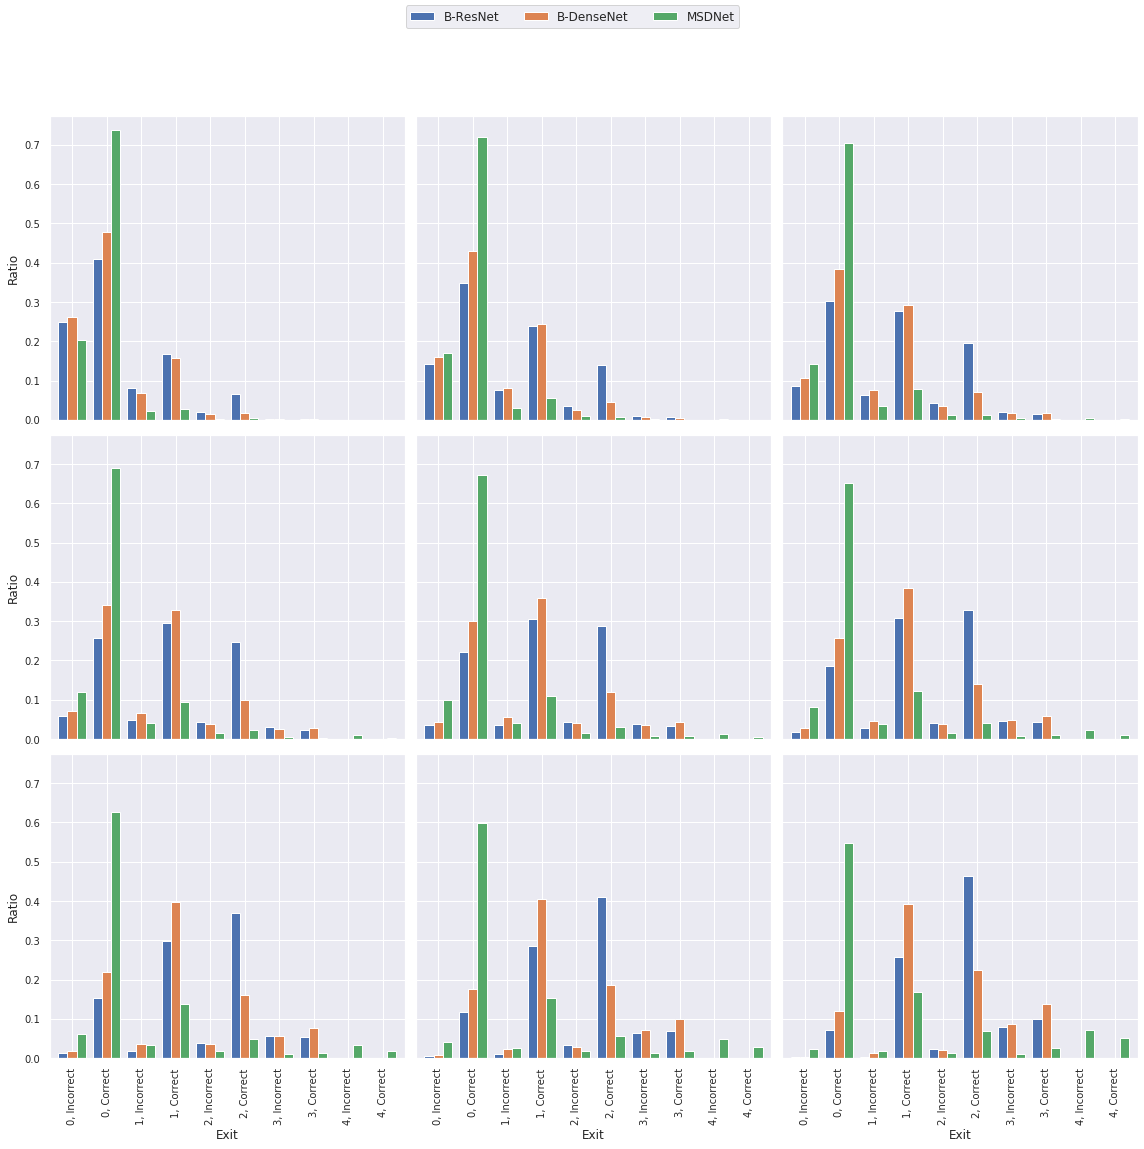

In [40]:
width=0.8
x=10
n = np.arange(x)
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(16,16))
for i, (ax, data) in enumerate(zip(axes.flat, df.groupby('threshold'))):
    #ax.set_title('Threshold {:0.1f}'.format(data[0]))
    xx = x + width/2
    #print(data[1].get('DenseNet'))
    #ax.bar(xx, np.array(data[1]['ResNet']))
    data[1].plot(kind='bar', ax=ax, legend=False, width=width)
    ax.label_outer()
    #i.xtickslabels([1, 2, 3, 4])
    ax.set(xlabel='Exit', ylabel='Ratio', xticks=np.arange(10))
    ax.set_xticklabels(list(np.array([['{}, Incorrect'.format(exit), '{}, Correct'.format(exit)] for exit in np.arange(5)]).flatten()))

    #for tick in ax.get_xticklabels():
    #   tick.set_rotation(90)
        
    #ax2 = ax.secondary_xaxis('bottom')
    #ax2.xaxis.set_ticks([1,3,5,7,9])
    #ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    #ax.spines['bottom'].set_position(('outward', 36))

    #ax2.label_outer()
fig.legend(['B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('inference_threshold_test.PNG')

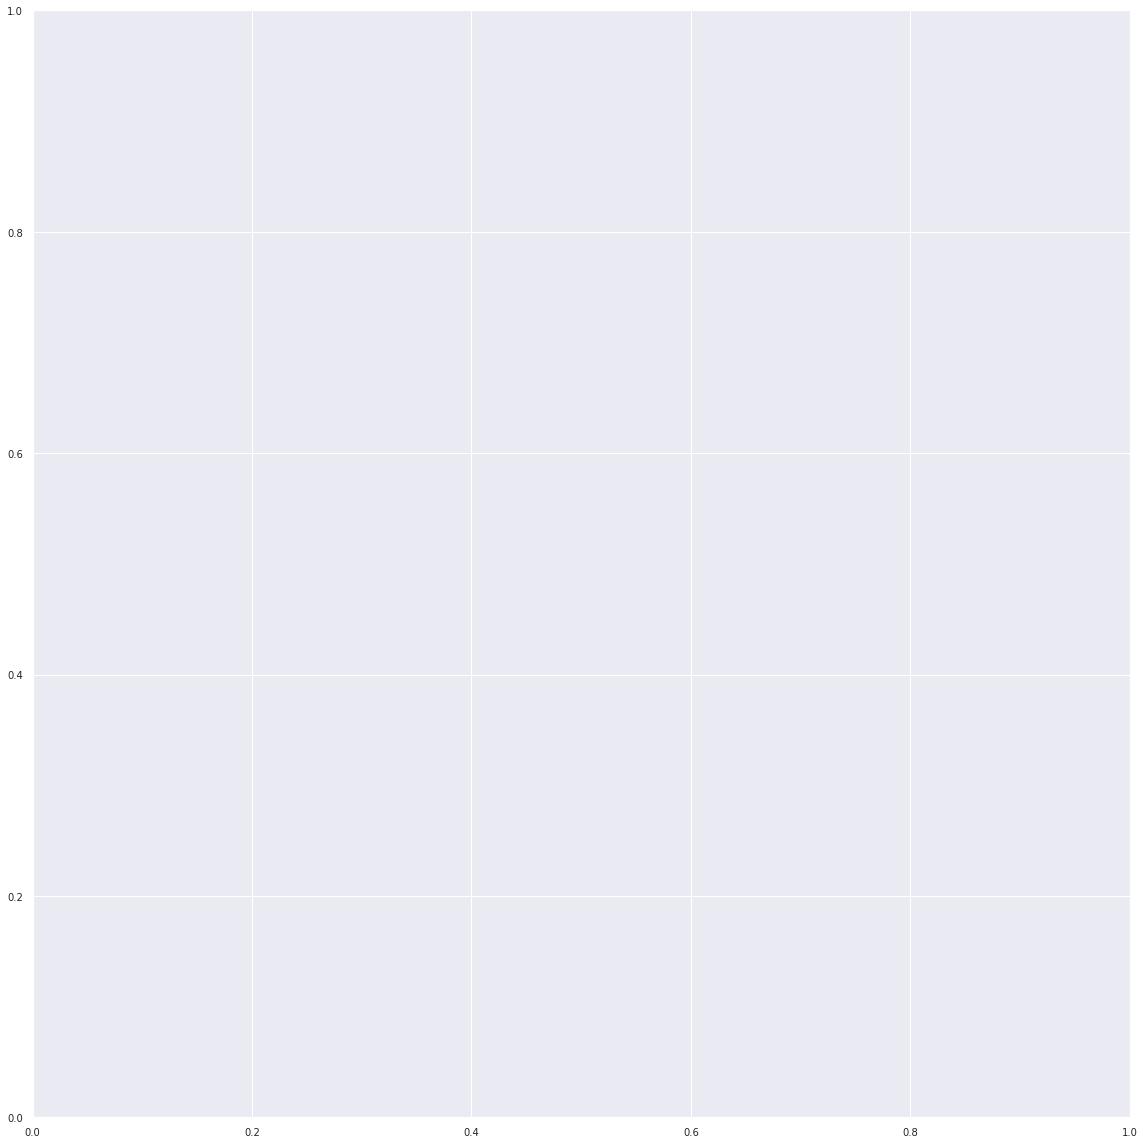

In [44]:
width=0.8
x=10
n = np.arange(x)
fig, axes = plt.subplots(1,1, sharex=True, sharey=True, figsize=(16,16))
for i, (data) in enumerate(df.groupby('threshold')):
    #ax.set_title('Threshold {:0.1f}'.format(data[0]))
    xx = x + width/2
    #print(data[1].get('DenseNet'))
    #ax.bar(xx, np.array(data[1]['ResNet']))
    data[1].plot(kind='bar', ax=ax, legend=False, width=width)
    #ax.label_outer()
    #i.xtickslabels([1, 2, 3, 4])
    ax.set(xlabel='Exit', ylabel='Ratio', xticks=np.arange(10))
    ax.set_xticklabels(list(np.array([['{}, Incorrect'.format(exit), '{}, Correct'.format(exit)] for exit in np.arange(5)]).flatten()))

    #for tick in ax.get_xticklabels():
    #   tick.set_rotation(90)
        
    #ax2 = ax.secondary_xaxis('bottom')
    #ax2.xaxis.set_ticks([1,3,5,7,9])
    #ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    #ax.spines['bottom'].set_position(('outward', 36))

    #ax2.label_outer()
#fig.legend(['B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=3, loc='upper center')
fig.tight_layout()
#fig.subplots_adjust(top=0.90)
#plt.savefig('inference_threshold_test.PNG')

In [ ]:
np.arange(1,6)*0.5

In [ ]:
list(np.array([['Correct {}'.format(exit), 'Incorrect {}'.format(exit)] for exit in np.arange(5)]).flatten())

In [ ]:
df['ResNet']

In [ ]:
models = ['b-densenet', 'b-resnet', 'msdnet']
df = pd.DataFrame({
        'model':models,
        'exit-0':np.random.randn(3),
        'score2':np.random.randn(3),

                   })

df